In [53]:
from PIL import Image
from dahuffman import HuffmanCodec
import ast

In [38]:
num_colors = 2

In [40]:
codec = HuffmanCodec.load(f"images/{num_colors}_huffman_doggo_raw.pickle")
codec.print_code_table()

Bits Code      Value Symbol
   4 0000          0 ']'
   7 0001000       8 '8'
   7 0001001       9 '4'
   9 000101000    40 _EOF
   9 000101001    41 '2'
   8 00010101     21 '3'
   9 000101100    44 '5'
   9 000101101    45 '9'
   8 00010111     23 '6'
   5 00011         3 '['
   3 001           1 '1'
   2 01            1 '0'
   2 10            2 ' '
   2 11            3 ','


In [46]:
with open(f"images/{num_colors}_huffman_doggo_raw.txt", mode="rb") as doggo_im_raw:
        im_data = doggo_im_raw.read()

In [55]:
raw_im_data = codec.decode(im_data)

list

In [63]:
print(raw_im_data[:100])
im_data = ast.literal_eval(raw_im_data)
centroids = im_data[0]
pixels = im_data[1:]

[[[164, 186, 129], [54, 48, 33]], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


In [78]:
im_width = len(pixels)
im_height = len(pixels[0])
im_width, im_height

(400, 286)

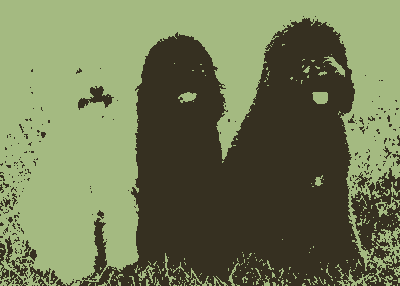

In [80]:
new_image = Image.new("RGB", (im_width, im_height), color=0)
for col in range(new_image.width):
    for row in range(new_image.height):
        new_pixel = centroids[pixels[col][row]]
        # new_pixel = centroids[col*new_image.height+row]
        new_image.putpixel((col, row), tuple(new_pixel))
new_image